In [1]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Helpers
import sys
from datetime import datetime
import pickle

from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,log_loss
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_validate
from sklearn.metrics import classification_report
from sklearn.model_selection import LeaveOneOut,KFold,StratifiedKFold
from sklearn.decomposition import PCA,KernelPCA
import lightgbm as lgb

import sys
sys.path.insert(0,'../../') 
from helpers import *
from MAP_estimator import MAP_estimator

# Algorithm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

data_path = '../data/'

In [2]:
v_name = pd.read_pickle(data_path+'v_gene.pkl')
train_y = pd.read_csv(data_path+'train_Y.csv')

In [3]:
v_name = pd.merge(train_y,v_name,on='sample_name')

In [4]:
v_name.head()

,sample_name,phenotype_status,TCRBV01-01,TCRBV02-01,TCRBV03-01,TCRBV03-02,TCRBV04-01,TCRBV04-02,TCRBV04-03,TCRBV05-01,...,TCRBV25-or09_02,TCRBV26-01,TCRBV26-or09_02,TCRBV27-01,TCRBV28-01,TCRBV29-01,TCRBV29-or09_02,TCRBV30-01,TCRBVA-or09_02,unresolved
0,HIP09097,0,58,5739,0,0,2671,2099,16,8774,...,0,0,0,3705,8783,3348,0,2008,1,26262
1,HIP05561,0,78,6991,2,2,3115,3537,4559,11805,...,0,0,0,3645,4939,5093,0,5459,0,36045
2,HIP13856,1,163,11561,4,6,7090,1963,4832,19888,...,0,0,0,10475,3430,5926,0,8790,6,61408
3,HIP05398,0,91,6253,2,9,4327,2148,7124,10633,...,0,0,0,8722,8320,6265,0,9918,3,48625
4,HIP13975,1,204,13722,1,6,7622,5320,4520,19727,...,0,0,0,7435,3238,6968,0,11053,6,68700


In [5]:
vName = v_name.drop(['sample_name','phenotype_status'],axis=1).columns.values

In [6]:
count_l = dict()
pos_count = []
neg_count = []
for v in vName:
    count_l[v] = v_name[v].sum()
    neg_count.append(v_name[v_name['phenotype_status']==0][v].mean())
    pos_count.append(v_name[v_name['phenotype_status']==1][v].mean())
   

In [7]:
vN = [i.replace('TCRBV','') for i in vName]

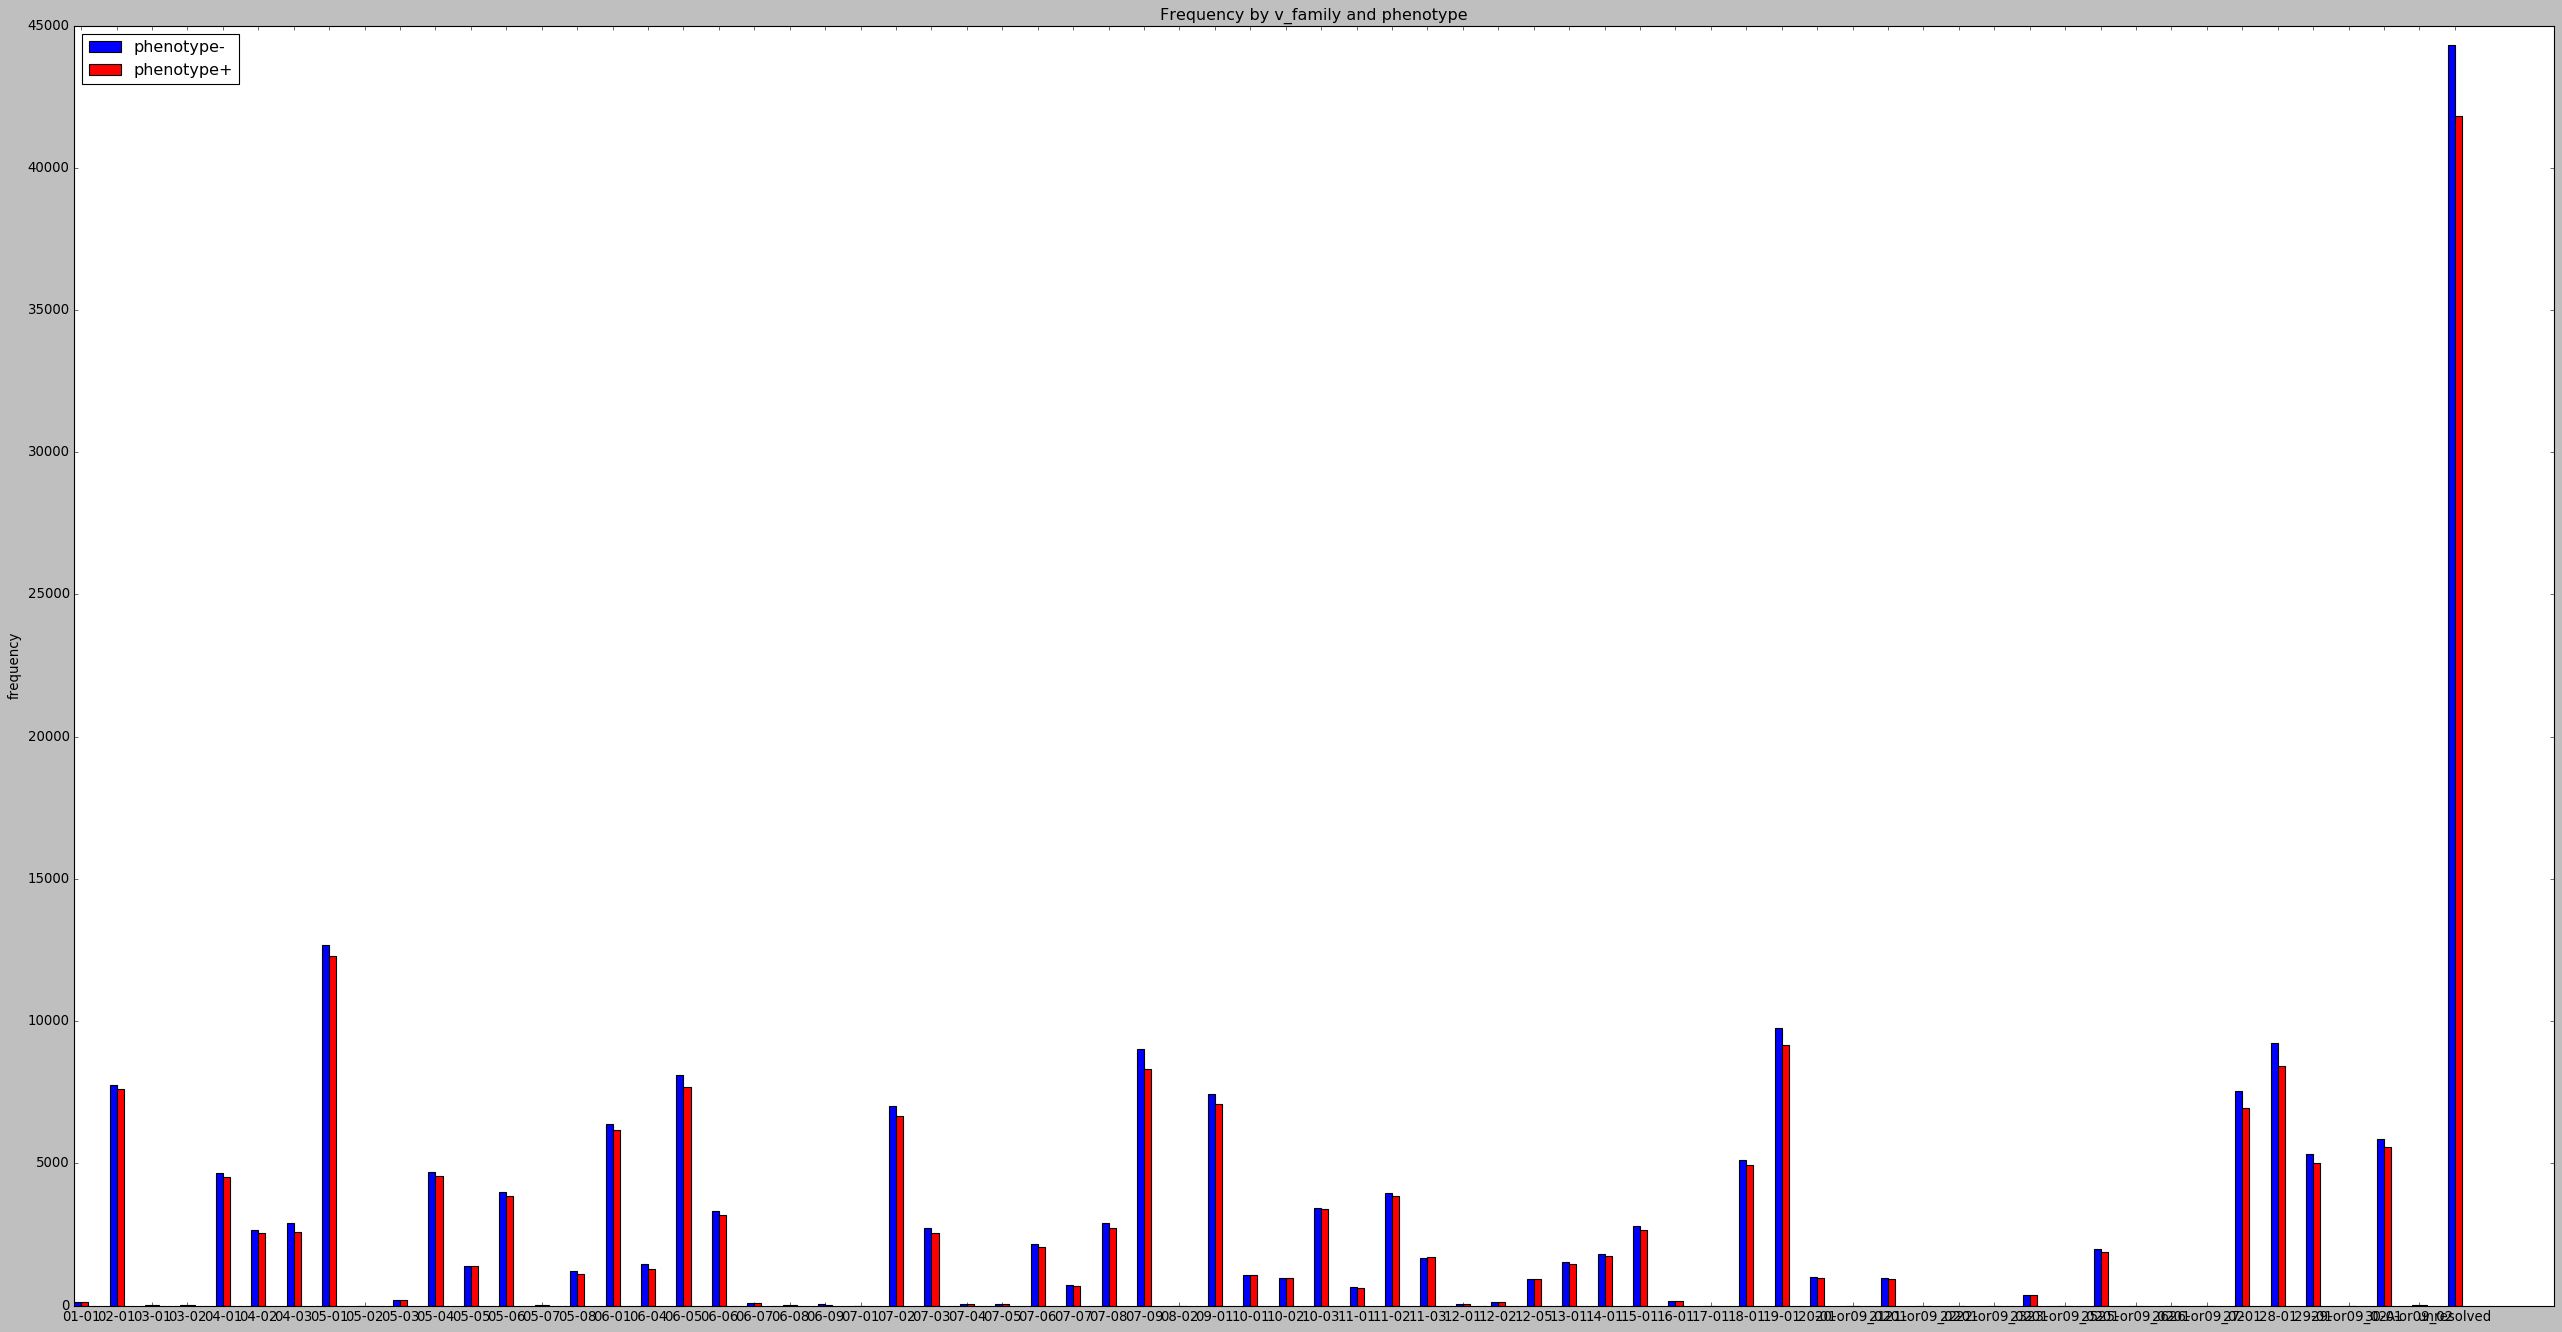

In [8]:
N = len(vName)

ind = np.arange(N)    # the x locations for the groups
width = 0.2    # the width of the bars: can also be len(x) sequence

plt.style.use('classic')
plt.figure(figsize=(40,20))
p1 = plt.bar(ind, neg_count, width,color='b')
p2 = plt.bar(ind+width, pos_count, width,color='r')

plt.ylabel('frequency')
plt.title('Frequency by v_family and phenotype')
plt.xticks(ind+width, vN)
plt.legend((p1[0], p2[0]), ('phenotype-', 'phenotype+'), loc='best')

plt.show()